In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab as pl
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

In [16]:
df = pd.read_csv('track_data.csv', index_col=0)

df.drop_duplicates(subset=['Track IDs'], keep='first', inplace=True)

df['Moods'] = (df['Moods'] != 'sad').astype(int)

df.head()

,Artists,Moods,Names,Track IDs,Loudness,Instrumentalness,Modality,Speechiness,Energy,Tempo,Valence
0,Lauv,0,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",322tcqPhma7F6hfCeLisx0,-6.460,0.000000,1,0.0683,0.558,95.016,0.678
1,Sabrina Carpenter,0,In My Bed,2o0KMNhcw5KO7CuslvR4Xs,-6.024,0.002290,0,0.0950,0.385,109.046,0.666
2,Bea Miller,0,feel something,7JDWhC422Gtk1Bq0mL3OTC,-8.914,0.000156,1,0.0707,0.415,136.029,0.156
3,MUNA,0,Who,0qTBo7ExHHGI7RLCk3CwDS,-5.770,0.000272,0,0.0514,0.667,150.093,0.219
4,Why Don't We,0,8 Letters,4zRZAmBQP8vhNPf9i9opXt,-5.702,0.000000,0,0.0310,0.478,88.979,0.255


In [21]:
df.Moods.value_counts()

0    230
1    226
Name: Moods, dtype: int64

In [26]:
X = df.iloc[:, 4:]
y = df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [39]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.717391304347826

In [35]:
nb.theta_

array([[-7.04865363e+00,  4.89293726e-02,  6.48044693e-01,
         6.92955307e-02,  6.00512849e-01,  1.19510726e+02,
         3.29624581e-01],
       [-5.45018919e+00,  5.43238400e-03,  7.18918919e-01,
         7.03724324e-02,  7.31064865e-01,  1.17017681e+02,
         5.75567568e-01]])

In [36]:
np.sqrt(nb.sigma_)

array([[ 2.83086726,  0.16628672,  0.47758079,  0.06557563,  0.19474333,
        26.39409417,  0.17823676],
       [ 1.73591336,  0.06151427,  0.4495277 ,  0.06563476,  0.12812015,
        24.40164892,  0.20295356]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


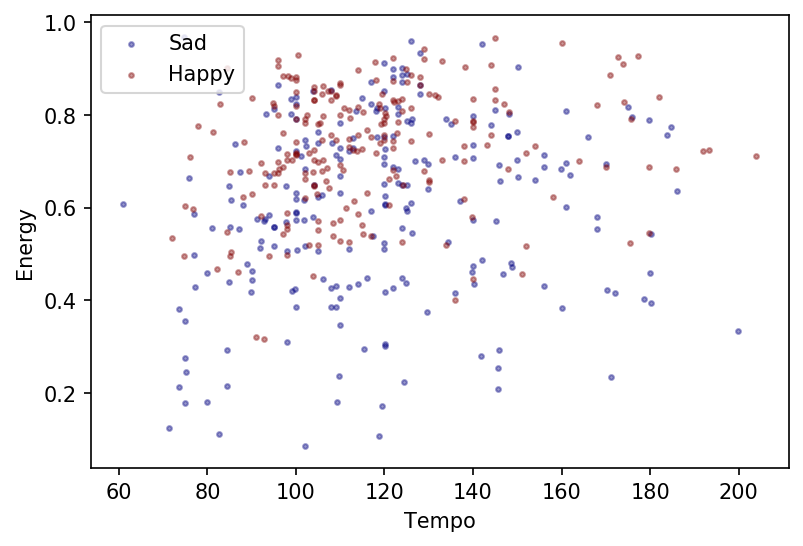

In [32]:
def scatter_plot_data(data):
    plt.figure(dpi=150)
    for ix, label in enumerate(['Sad','Happy']):
        new_df = df[df['Moods']==ix]
        plt.scatter(new_df['Tempo'], new_df['Energy'],c=plt.cm.jet(ix/0.5), alpha=0.4, label=label, s=5)
    plt.xlabel("Tempo")
    plt.ylabel("Energy")
    plt.legend(loc="upper left");

scatter_plot_data(df)